In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


# Load the Dogs vs. Cats dataset
train_dataset, info = tfds.load('cats_vs_dogs', split='train[:80%]', with_info=True, as_supervised=True)
test_dataset = tfds.load('cats_vs_dogs', split='train[80%:]', with_info=False, as_supervised=True)

# Preprocess the data

## your code goes here##
def format_image(image, label):
    # Normalize the pixel values
    image = tf.cast(image, tf.float32) / 255.0
    # Resize the image to (150,150)
    image = tf.image.resize(image, (150, 150))
    return image, label

train_data = train_dataset.map(format_image).shuffle(1000).batch(32)
test_data = test_dataset.map(format_image).batch(32)

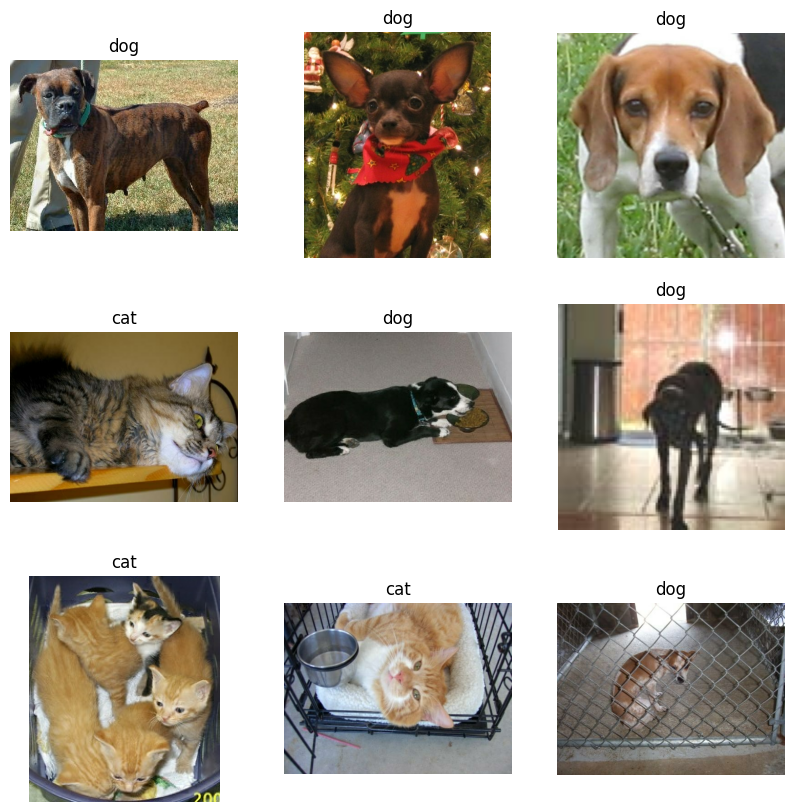

In [2]:
##show some of images with their labels
## your code goes here##
label_names = ['cat', 'dog']

plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_dataset.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(label_names[label])
    plt.axis('off')

In [7]:
# Load the Inception-v3 model
inception_model =InceptionV3(weights='imagenet', include_top=False, input_shape=(150,150, 3))
print(inception_model.summary())


Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 74, 74, 32)           864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 74, 74, 32)           96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 74, 74, 32)           0         ['batch_normalizati

In [11]:
#create your model
#dont forget to freeze the pretrained part
##your code goes here##
inception_model.trainable = False

model = models.Sequential([
    inception_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1)
])

In [12]:
# Compile the model
##your code goes here##
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
# Print model summary
##your code goes here##
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_2 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 21804833 (83.18 MB)
Trainable params: 2049 (8.00 KB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________
None


In [13]:
#train your model
##your code goes here##
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(train_data, epochs=10, validation_data=test_data, callbacks=[early_stopping])

Epoch 1/10
582/582 [==============================] - 48s 73ms/step - loss: 1.4605 - accuracy: 0.8908 - val_loss: 0.5949 - val_accuracy: 0.9521
Epoch 2/10
582/582 [==============================] - 40s 65ms/step - loss: 0.9025 - accuracy: 0.9352 - val_loss: 0.8071 - val_accuracy: 0.9426
Epoch 3/10
582/582 [==============================] - 37s 61ms/step - loss: 0.8892 - accuracy: 0.9367 - val_loss: 0.5903 - val_accuracy: 0.9579
Epoch 4/10
582/582 [==============================] - 38s 63ms/step - loss: 0.6928 - accuracy: 0.9505 - val_loss: 0.6673 - val_accuracy: 0.9531
Epoch 5/10
582/582 [==============================] - 38s 63ms/step - loss: 0.8250 - accuracy: 0.9419 - val_loss: 0.7156 - val_accuracy: 0.9491


In [14]:
#report the accuracy on your test set
##your code goes here##
accuracy = model.evaluate(test_data)[1]
print(f'Test accuracy: {accuracy}')

146/146 [==============================] - 8s 54ms/step - loss: 0.5903 - accuracy: 0.9579
Test accuracy: 0.9578675627708435
